<a href="https://colab.research.google.com/github/JoaoP29/abcia/blob/main/knn_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libs

#Tensorflow and keras for neural network
import tensorflow as tf
from tensorflow import keras

#Auxilary libs to plots and processing
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

print(tf.__version__)

2.12.0


In [2]:
#Importing data
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

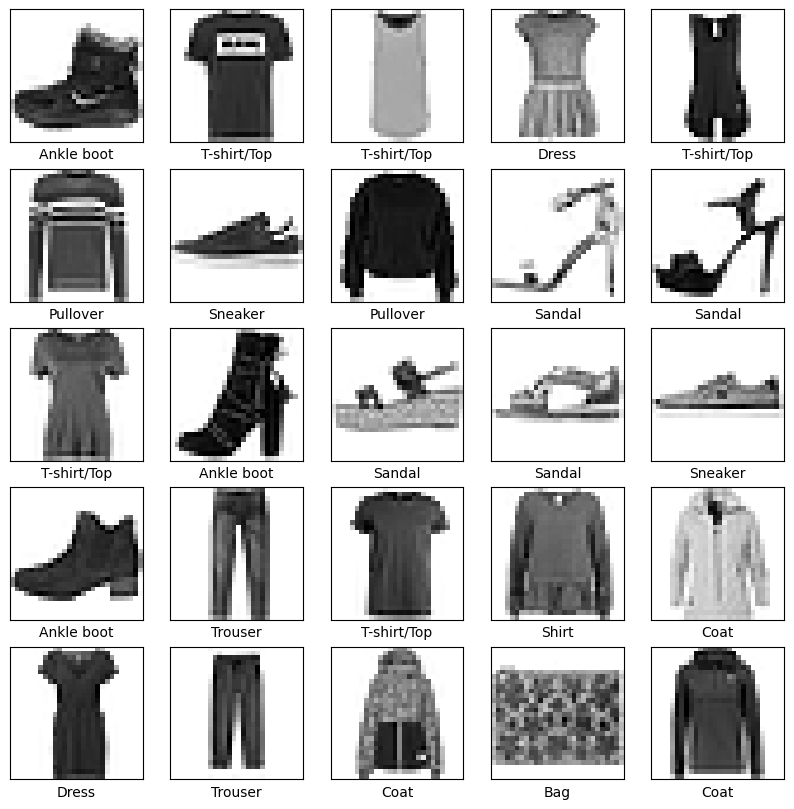

In [5]:
#Dataset visualization
plt.figure(figsize = (10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [6]:
#Reshaping our matrix to 4 dimensions, so that keras can handle it
bkp_ori_shape_train = train_images.shape
bkp_ori_shape_test = test_images.shape

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print('shape train:', train_images.shape)
print('shape test:', test_images.shape)
input_shape = (28, 28, 1)

#Converting non-assigned integers to float
train_norm = train_images.astype('float32')
test_norm = test_images.astype('float32')

#Normalizing RGB codes to max RGB
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

shape train: (60000, 28, 28, 1)
shape test: (10000, 28, 28, 1)


In [7]:
#Reshaping to visualize the first image
first_train_norm = train_norm[0].reshape(28, 28)

#Visualizing the values of each image pixel place
fig = px.imshow(first_train_norm, text_auto = True, color_continuous_scale = 'Greys')
fig.show()

In [8]:
#Coding the model

model = keras.Sequential(
    [
      keras.layers.Conv2D(
          filters = 8,
          kernel_size = 5,
          padding = 'same',
          activation = 'relu',
          input_shape = input_shape
     ),
     keras.layers.MaxPooling2D(
         pool_size = 2,
         strides = 2
     ), #Decreasing samples from 28*28 to 14*14
     keras.layers.Conv2D(
         filters = 16,
         kernel_size = 5,
         padding = 'same',
         activation = 'relu'
     ),
     keras.layers.MaxPooling2D(
         pool_size = 2,
         strides = 2
     ), #Decreasing samples from 14*14 to 7*7
     keras.layers.Flatten(),
     keras.layers.Dense(120, activation = 'relu'),
     keras.layers.Dense(84, activation = 'relu'),
     keras.layers.Dense(10, activation = 'softmax')
    ]
)

In [9]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


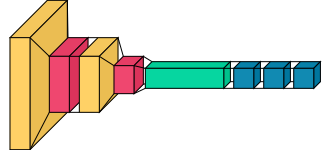

In [10]:
import visualkeras
visualkeras.layered_view(model)

In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
#FIT
history_train = model.fit(
    train_norm,
    train_labels,
    epochs = 8,
    validation_data = (test_norm, test_labels)
)

Epoch 1/8
1875/1875 [==============================] - 21s 8ms/step - loss: 0.5083 - accuracy: 0.8166 - val_loss: 0.3867 - val_accuracy: 0.8610
Epoch 2/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3385 - accuracy: 0.8756 - val_loss: 0.3524 - val_accuracy: 0.8703
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2905 - accuracy: 0.8924 - val_loss: 0.3070 - val_accuracy: 0.8868
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2626 - accuracy: 0.9022 - val_loss: 0.2930 - val_accuracy: 0.8886
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2379 - accuracy: 0.9112 - val_loss: 0.2832 - val_accuracy: 0.8938
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2201 - accuracy: 0.9174 - val_loss: 0.2833 - val_accuracy: 0.8940
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2011 - accuracy: 0.9241 - val_loss: 0.2716 - val_accuracy: 0.90

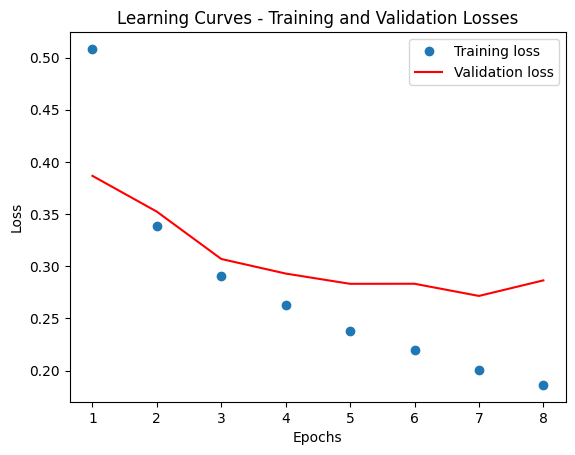

In [13]:
#Learnship curve

loss_train = history_train.history['loss']
loss_val = history_train.history['val_loss']

epochs = range(1, 9)

plt.plot(epochs, loss_train, 'o', label = 'Training loss')
plt.plot(epochs, loss_val, 'r', label = 'Validation loss')

plt.title('Learning Curves - Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

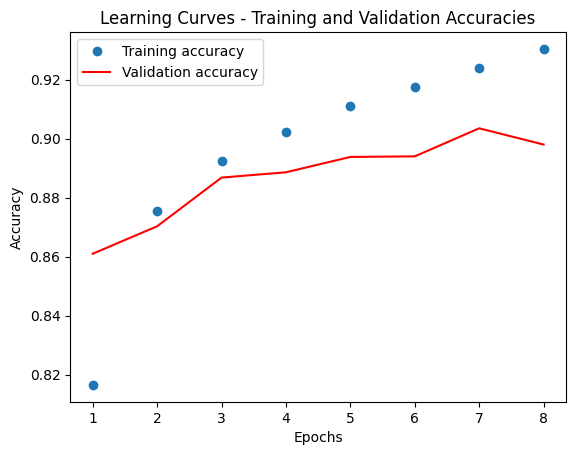

In [14]:
#Learnship curve

loss_train = history_train.history['accuracy']
loss_val = history_train.history['val_accuracy']

epochs = range(1, 9)

plt.plot(epochs, loss_train, 'o', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'r', label = 'Validation accuracy')

plt.title('Learning Curves - Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
#Get classification probabilities
pbm = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = pbm.predict(test_norm)

313/313 [==============================] - 1s 2ms/step


In [16]:
#Get classification values
correct = 0

list_pred_argmax = []
for p in predictions:
  list_pred_argmax.append(np.argmax(p))

list_pred_by_img = np.array(list_pred_argmax)
correct = np.nonzero(list_pred_by_img == test_labels)[0]
incorrect = np.nonzero(list_pred_by_img != test_labels)[0]

print('Correct predictions:', len(correct))
print('Inorrect predictions:', len(incorrect))

from sklearn.metrics import classification_report

target_names = ['Class {}'.format(i) for i in range(10)]
print(classification_report(test_labels, list_pred_by_img, target_names = target_names))

Correct predictions: 8980
Inorrect predictions: 1020
              precision    recall  f1-score   support

     Class 0       0.82      0.89      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.81      0.88      0.85      1000
     Class 3       0.93      0.87      0.90      1000
     Class 4       0.74      0.91      0.82      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.85      0.56      0.68      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [17]:
predictions[0]

array([0.08537035, 0.08537035, 0.08537035, 0.08537035, 0.08537035,
       0.08537064, 0.08537035, 0.08560015, 0.08537035, 0.23143685],
      dtype=float32)

In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color = color)
    
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

In [28]:
test_norm_no_shape = test_norm.reshape(bkp_ori_shape_test)
test_norm_no_shape.shape

(10000, 28, 28)

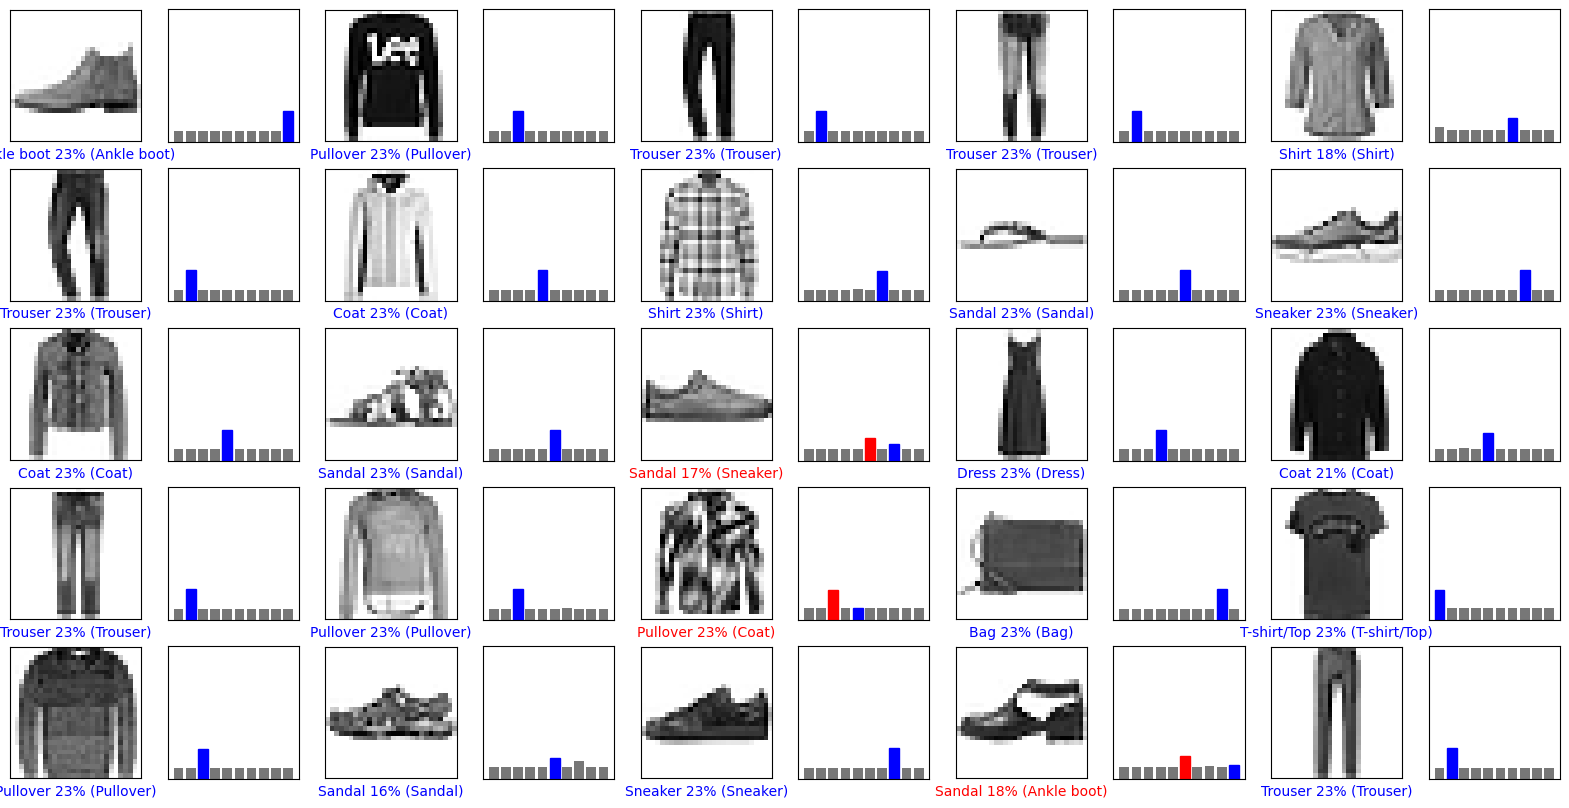

In [29]:
#It paints right predictions in blue and incorrect ones in red

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_norm_no_shape)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

plt.show()